# Getting data from OpenAlex API

In [1]:
import requests
import pandas as pd

data_ia_fr = []
for year in range(2010, 2024):
    print(year, end=',')
    url = f"https://api.openalex.org/works?page=1&filter=concepts.id:C154945302,institutions.country_code:FR,publication_year:{year}&group_by=authorships.institutions.id"
    r = requests.get(url).json()
    nb_publications_fr = r['meta']['count']
    current_data = r['group_by']
    for e in current_data:
        e['fr_share'] = int(10000 * e['count']/nb_publications_fr)/100
        e['total'] = nb_publications_fr
        e['year'] = year
    data_ia_fr += current_data
df = pd.DataFrame(data_ia_fr)

2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,

In [2]:
df.to_csv('data_ia_fr.csv', index=False)

In [5]:
def format_label(x):
    current_str=''
    res=[]
    for c in x.split(' '):
        if len(current_str)<15:
            current_str+=c+' '
        else:
            res.append(current_str)
            current_str=c+' '
    res.append(current_str)
    return '\n'.join(res).strip()
            
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
SIZE = 22
SMALL_SIZE=18
plt.rc('font', size=SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SIZE)    # legend fontsize
plt.rc('figure', titlesize=SIZE)  # fontsize of the figure title       

# Top établissement 2022

In [53]:
organismes=['French National Centre for Scientific Research',
           'Inserm', 'French Institute for Research in Computer Science and Automation',
            'Atomic Energy and Alternative Energies Commission',
 'National Research Institute for Agriculture, Food and Environment',
           ]

df_2022 = df[df.year==2022]
TOP = 21
top_etab = [{'etab': x, 'label': format_label(x)} for x in df_2022.head(100).key_display_name.to_list()]
top_shares = df_2022.head(100).fr_share.to_list()
top_count = df_2022.head(100)['count'].to_list()

top_etab_filtered, top_shares_filtered, top_count_filtered = [], [], []
for ix, t in enumerate(top_etab):
    if len(top_etab_filtered) == TOP:
        break
    if t['label'] not in [format_label(o) for o in organismes+['Université Toulouse III - Paul Sabatier']]:
        top_etab_filtered.append(t)
        top_shares_filtered.append(top_shares[ix])
        top_count_filtered.append(top_count[ix])
    else:
        pass

In [54]:
color_dict = {}
color_dict['University of Paris-Saclay'] = '#63003C'
color_dict['Sorbonne Université'] = '#042f66'
color_dict['Université Grenoble Alpes'] = '#FF4E01'
color_dict['Institut Polytechnique de Paris'] = 'black'
color_dict['Université Paris Sciences et Lettres']='#2F3B89'
color_dict['Université de Lorraine'] ='#FFF044'
color_dict['Université de Toulouse'] = '#BE2125'
color_dict['University of Rennes'] = 'black'
color_dict["Université Côte d'Azur"] = "#007FA5"
color_dict['University of Strasbourg'] = '#303030'


In [58]:
colors = ['grey']*TOP
for ix, etab in enumerate(top_etab_filtered):
    if etab['etab'] in color_dict:
        colors[ix] = color_dict[etab['etab']]
#colors

<ipython-input-59-247b511779a9>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([e['label'] for e in top_etab_filtered], rotation='vertical', fontsize=SMALL_SIZE)


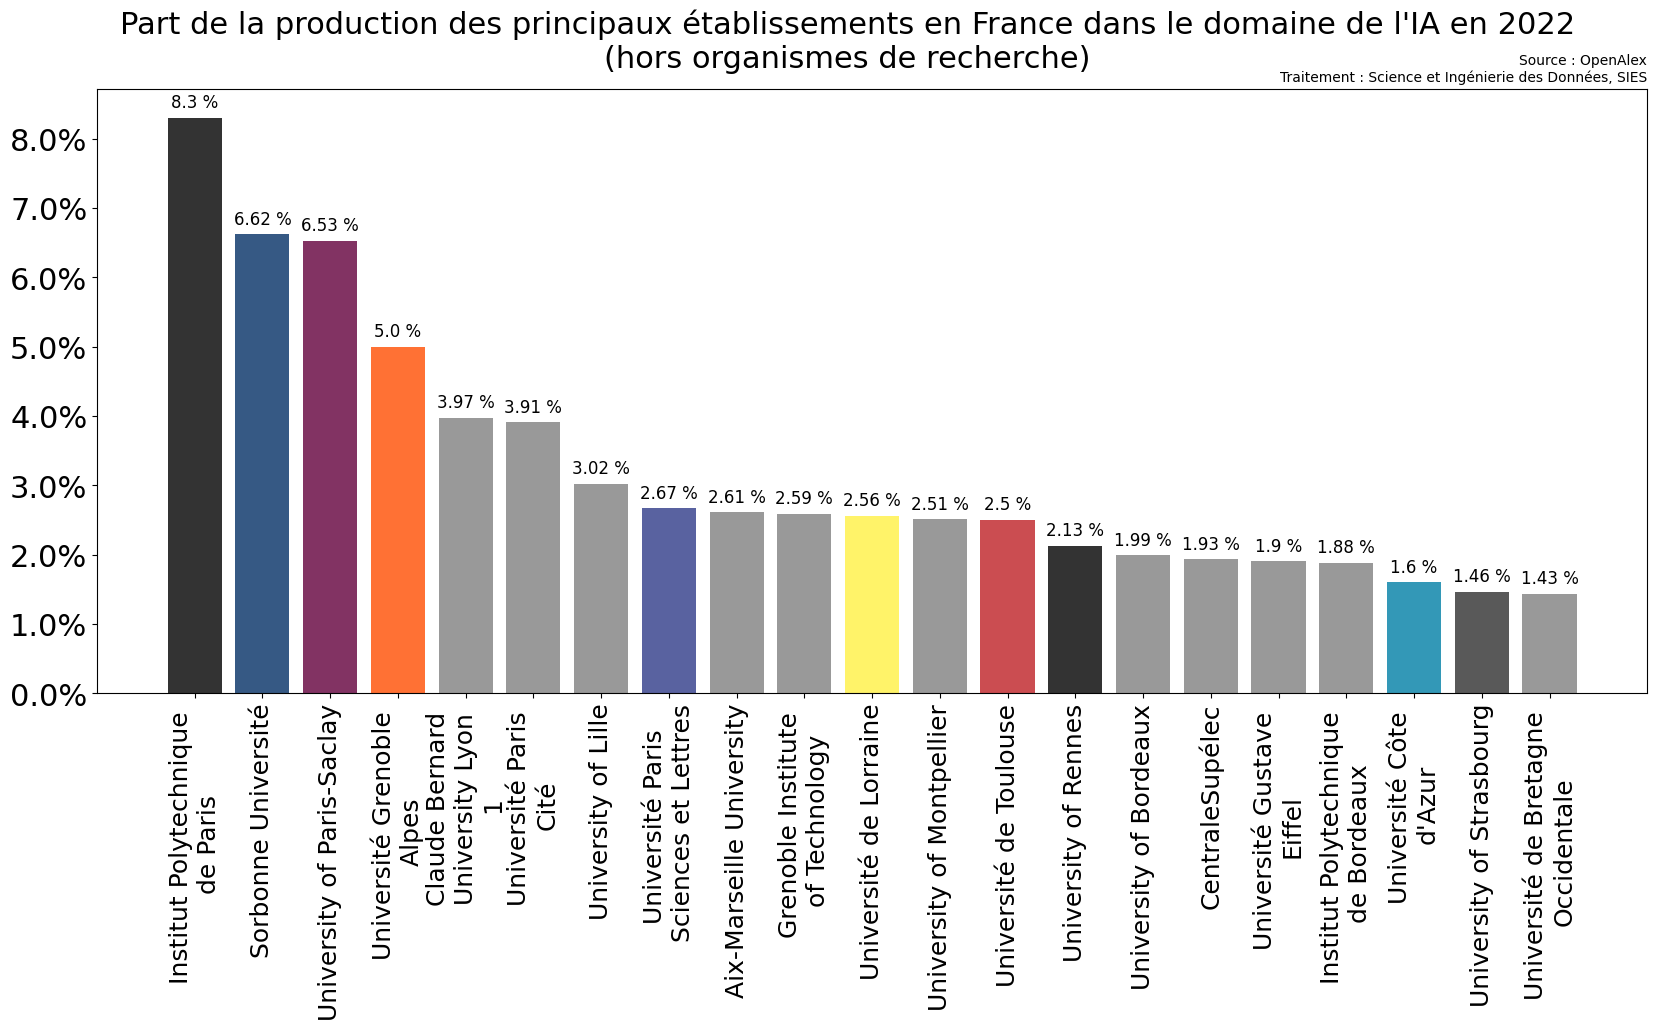

In [59]:
fig, ax = plt.subplots(figsize=(20,8), dpi=100)

ax.bar([e['label'] for e in top_etab_filtered], top_shares_filtered, 
       alpha=0.8, color=colors
      )
plt.suptitle(f"Part de la production des principaux établissements en France dans le domaine de l'IA en 2022\n(hors organismes de recherche)")
plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticklabels([e['label'] for e in top_etab_filtered], rotation='vertical', fontsize=SMALL_SIZE)
for i in range(len(top_etab_filtered)):
    plt.text(i, top_shares_filtered[i]+0.15, str(top_shares_filtered[i])+' %', ha = 'center', fontsize=12)

In [12]:
df_etablissement_2022 = pd.DataFrame({'Etablissement': top_etab_filtered, 
              'Contribution 2022 (%)': top_shares_filtered,
             'Nombre de publications 2022 en IA': top_count_filtered})
df_etablissement_2022.to_csv('publications_2022_ia_etablissement.csv', index=False)

# Evolution par établissement

In [60]:
def make_graph_share_year(current_etab):
    if current_etab in color_dict:
        color = color_dict[current_etab]
    else:
        color='grey'
    current_df = df[df.key_display_name == current_etab ]
    current_df = current_df[2015<=current_df.year]
    years = current_df.year.to_list()
    shares = current_df.fr_share.to_list()
    #shares_complement = [1-k for k in shares]

    fig, ax = plt.subplots(figsize=(20,8), dpi=100)

    ax.stackplot(years, [shares], 
                 labels=[current_etab], alpha=0.8, color=[color])
    ax.legend(loc='upper left')

    plt.suptitle(f"Part de la production de {current_etab} en France dans le domaine de l'IA")
    plt.title('Source : OpenAlex\nTraitement : Science et Ingénierie des Données, SIES', size=10, loc='right')
    ax.set_subplotspec
    ax.set_xlabel('Année')
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.set_ylabel(f"Contribution de {current_etab}")
    ax.set_ylim(0, 10)

    plt.show()

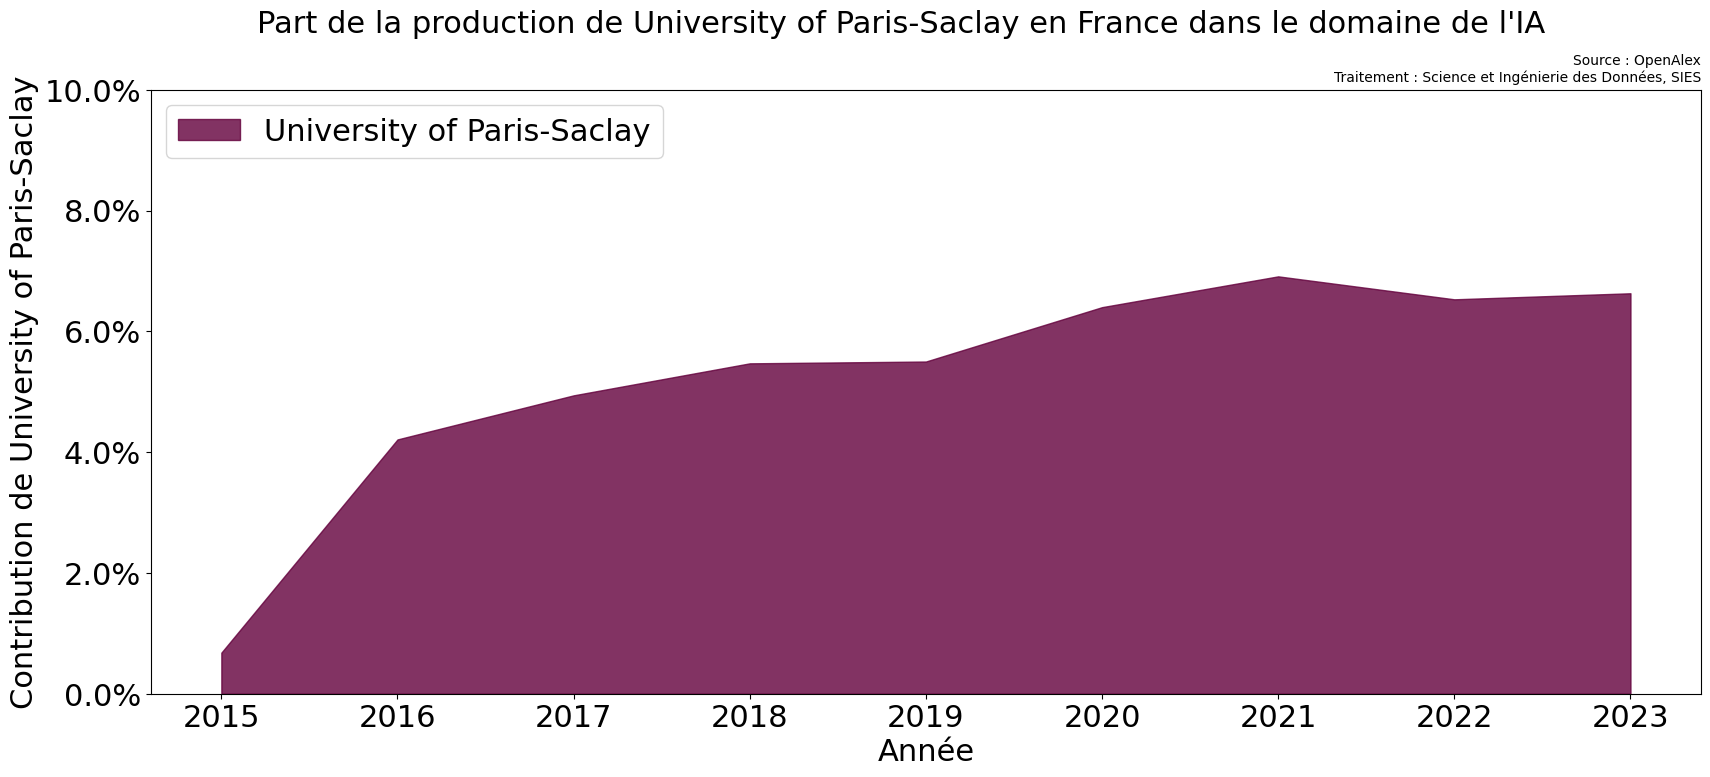

In [61]:
make_graph_share_year('University of Paris-Saclay')

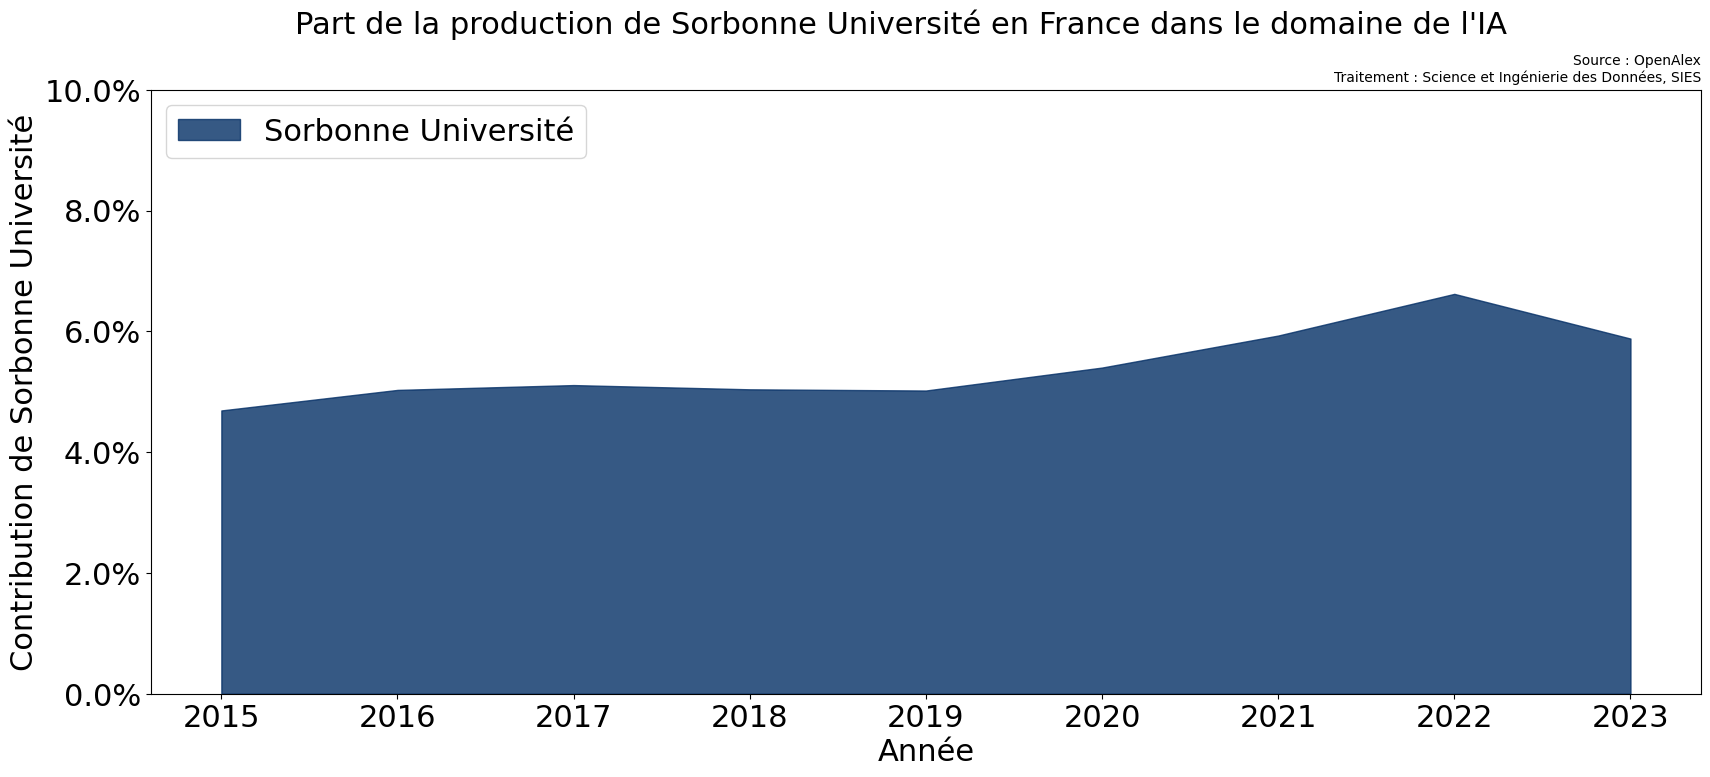

In [62]:
make_graph_share_year('Sorbonne Université')

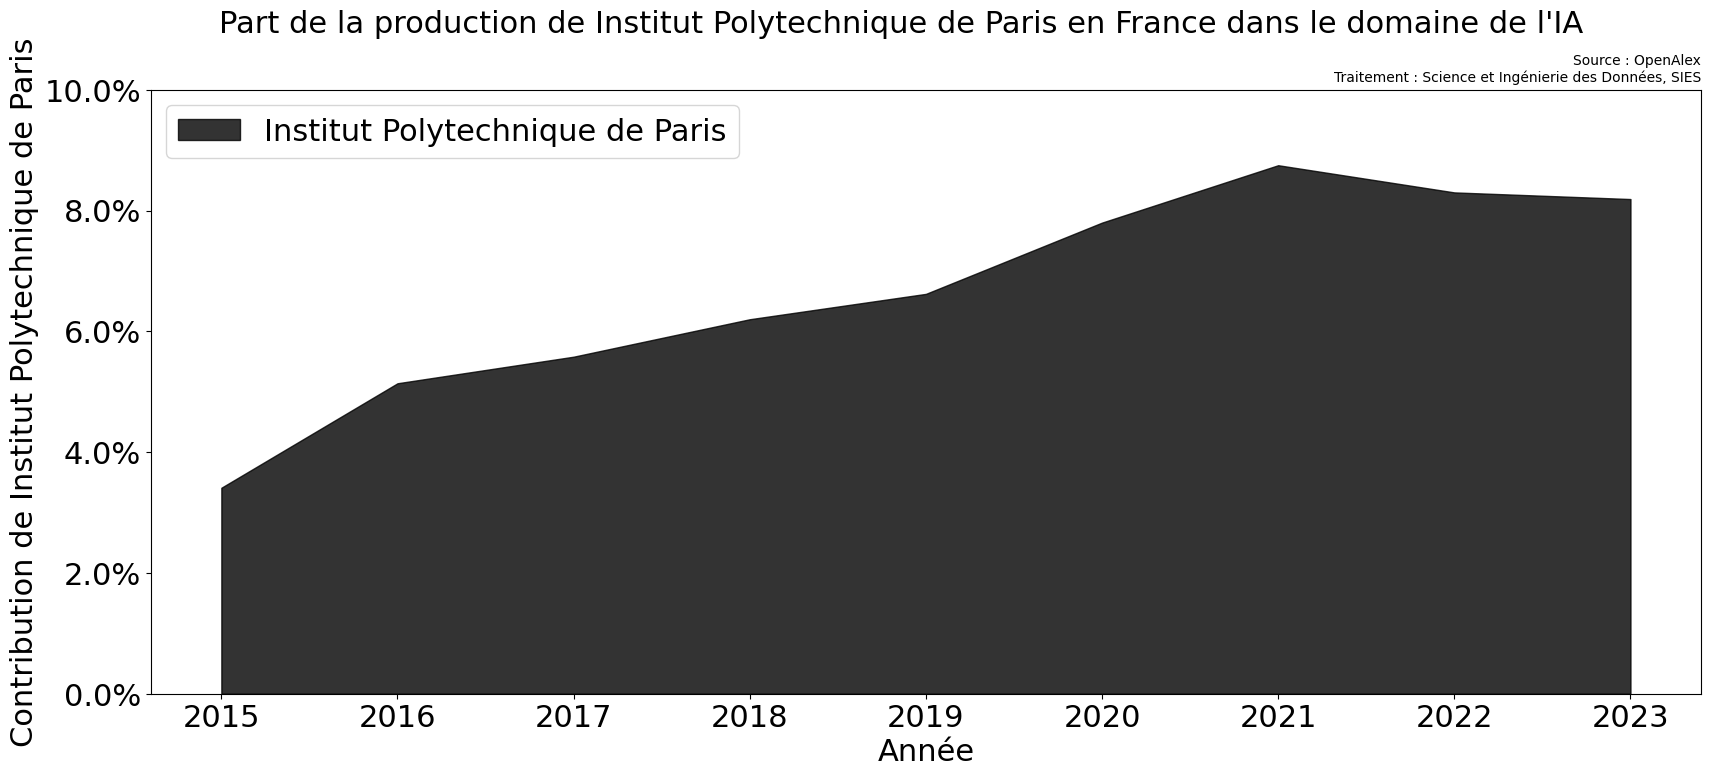

In [63]:
make_graph_share_year('Institut Polytechnique de Paris')

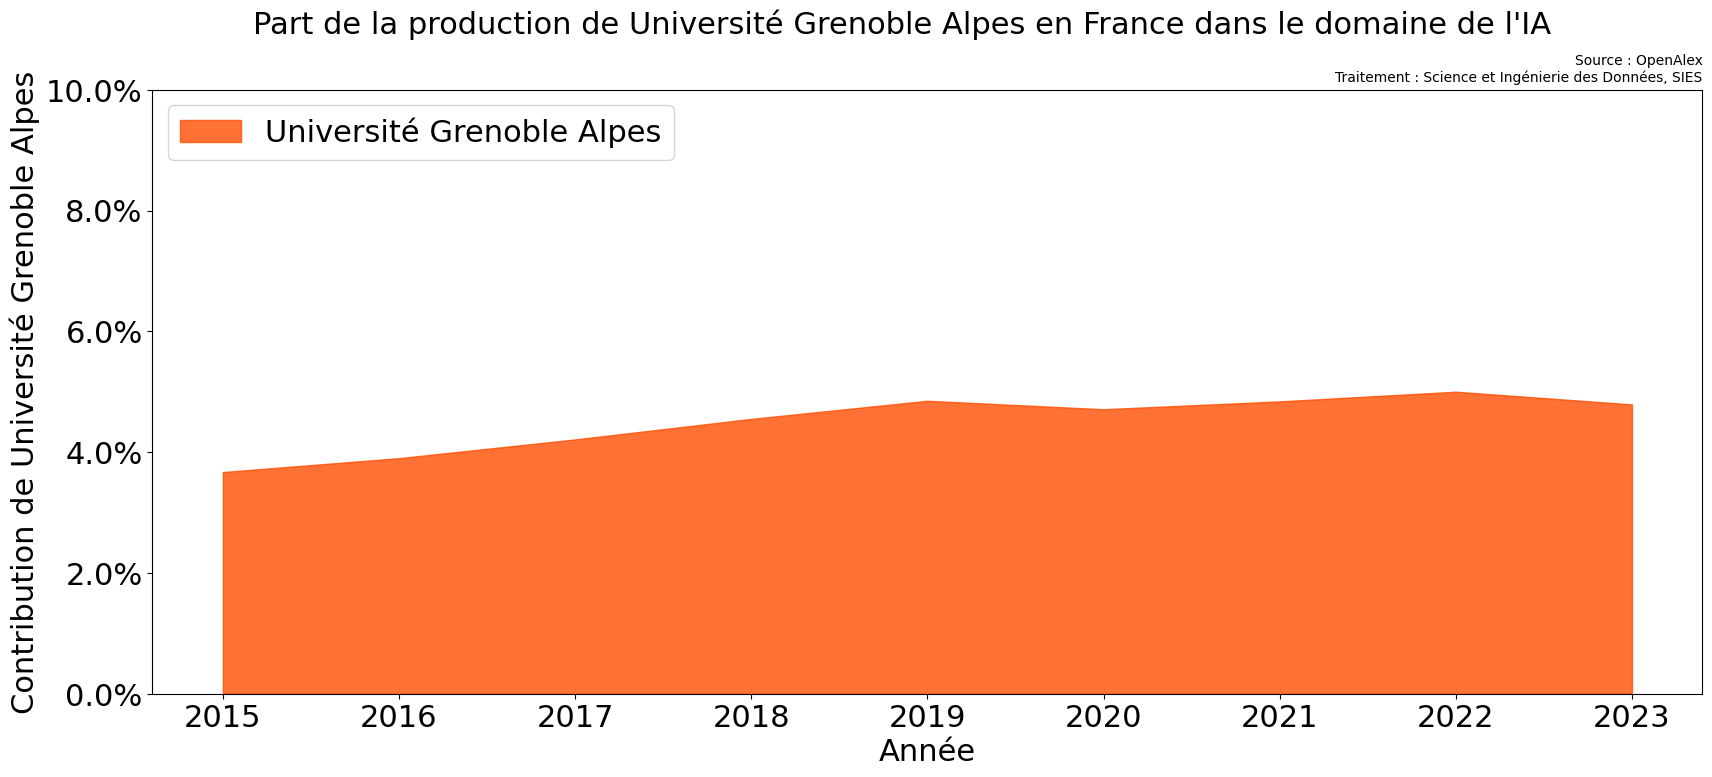

In [64]:
make_graph_share_year('Université Grenoble Alpes')

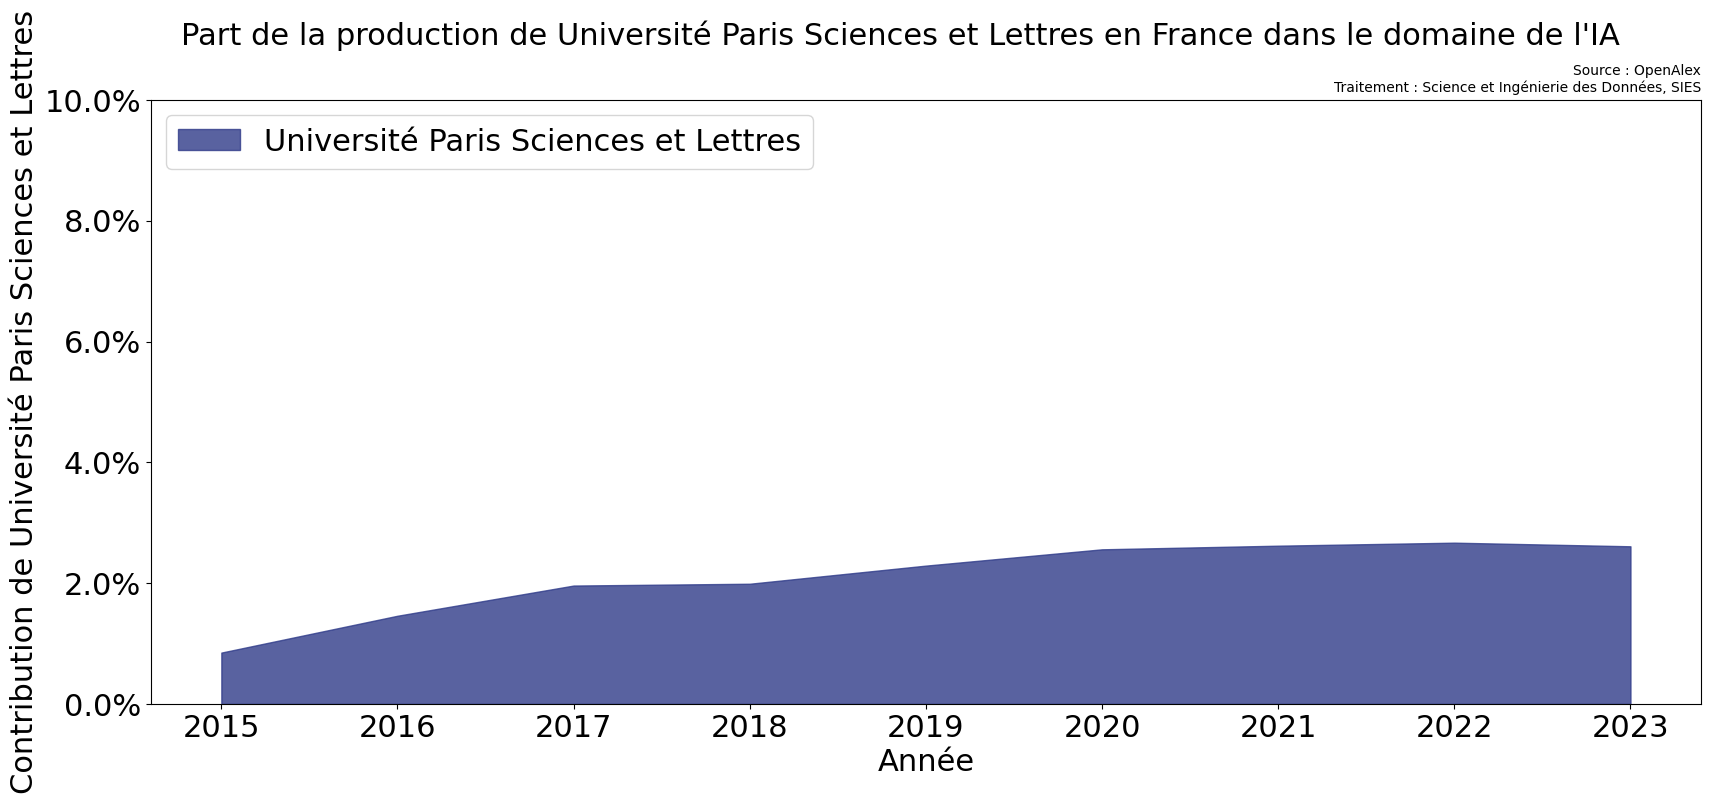

In [65]:
make_graph_share_year('Université Paris Sciences et Lettres')

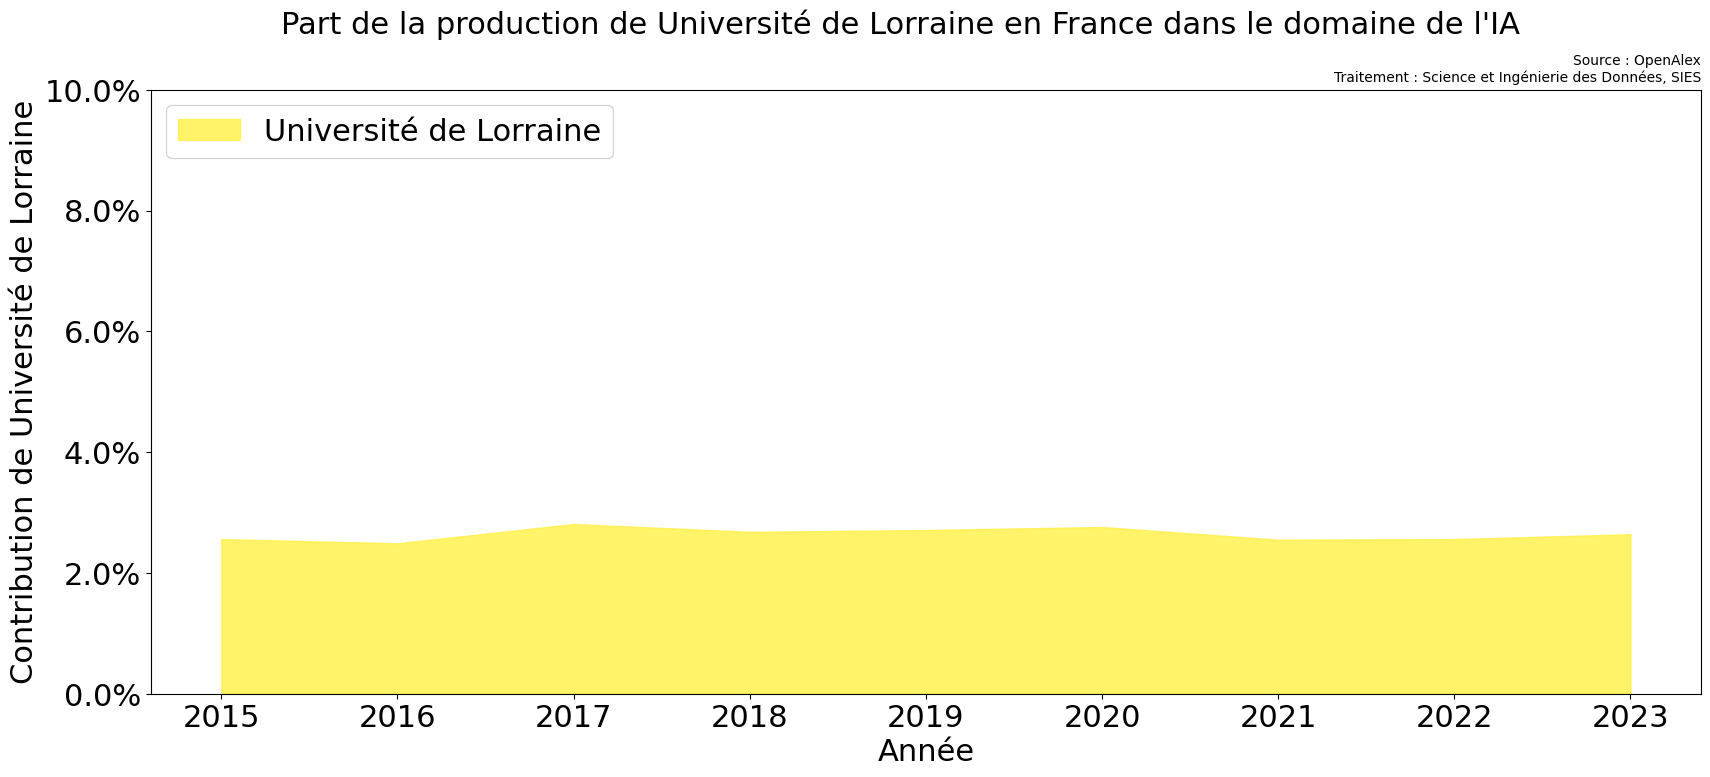

In [66]:
make_graph_share_year('Université de Lorraine')

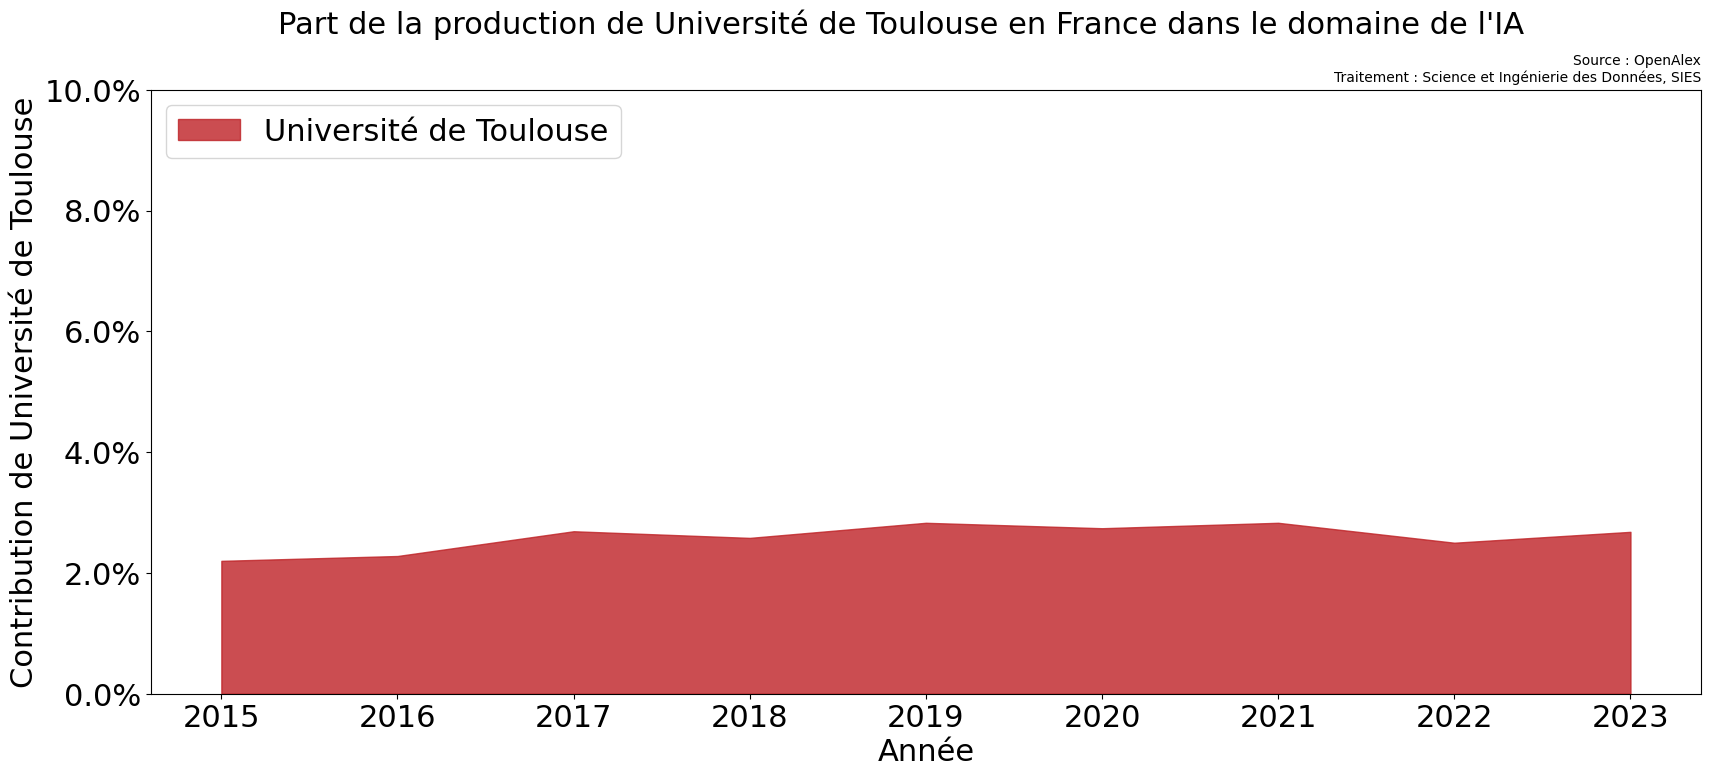

In [67]:
make_graph_share_year('Université de Toulouse')

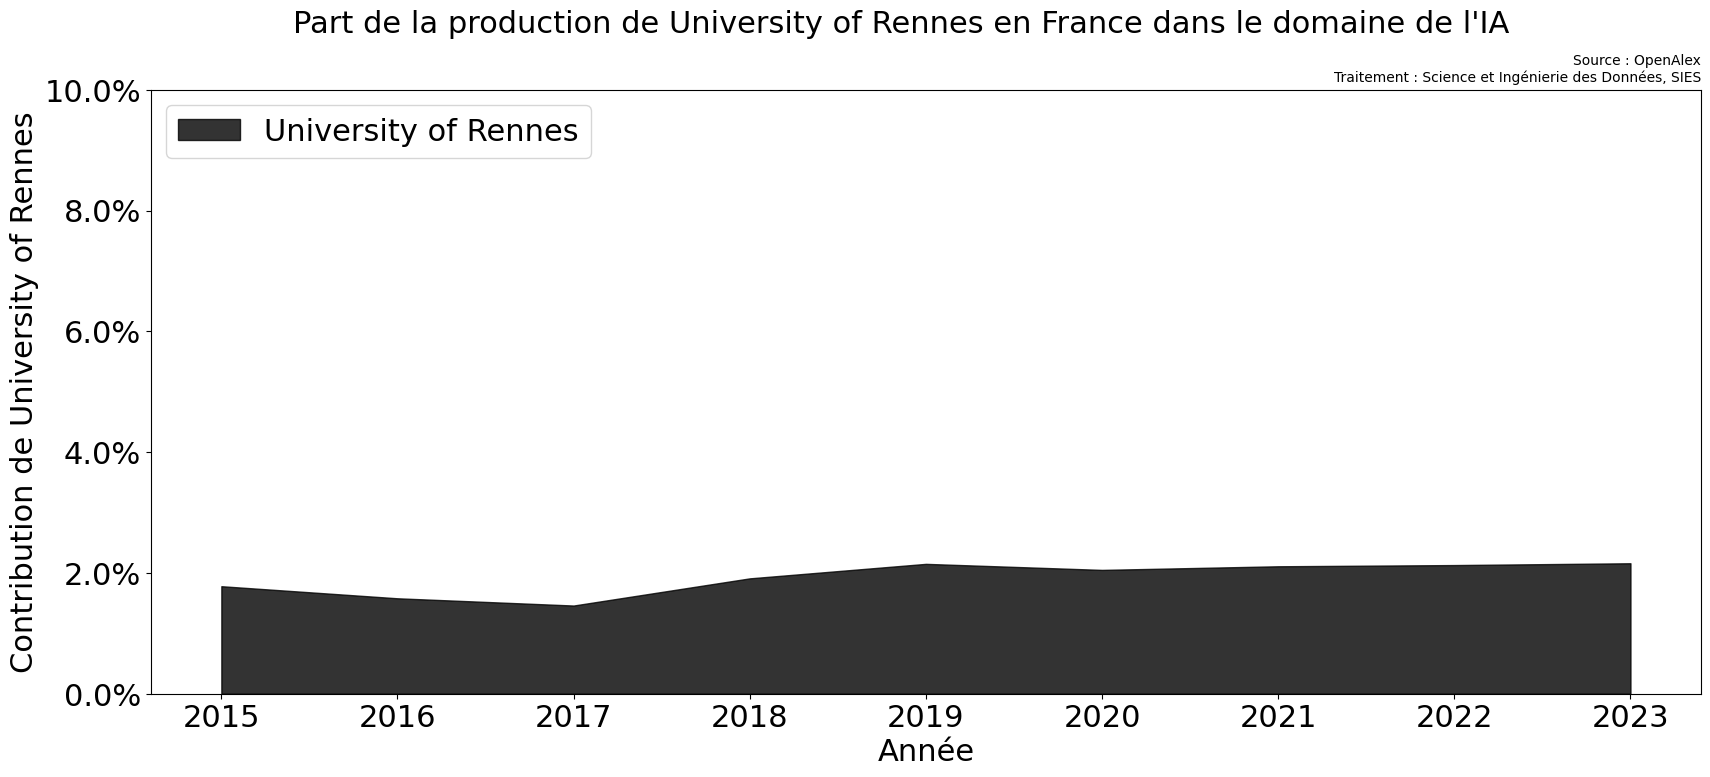

In [68]:
make_graph_share_year('University of Rennes')

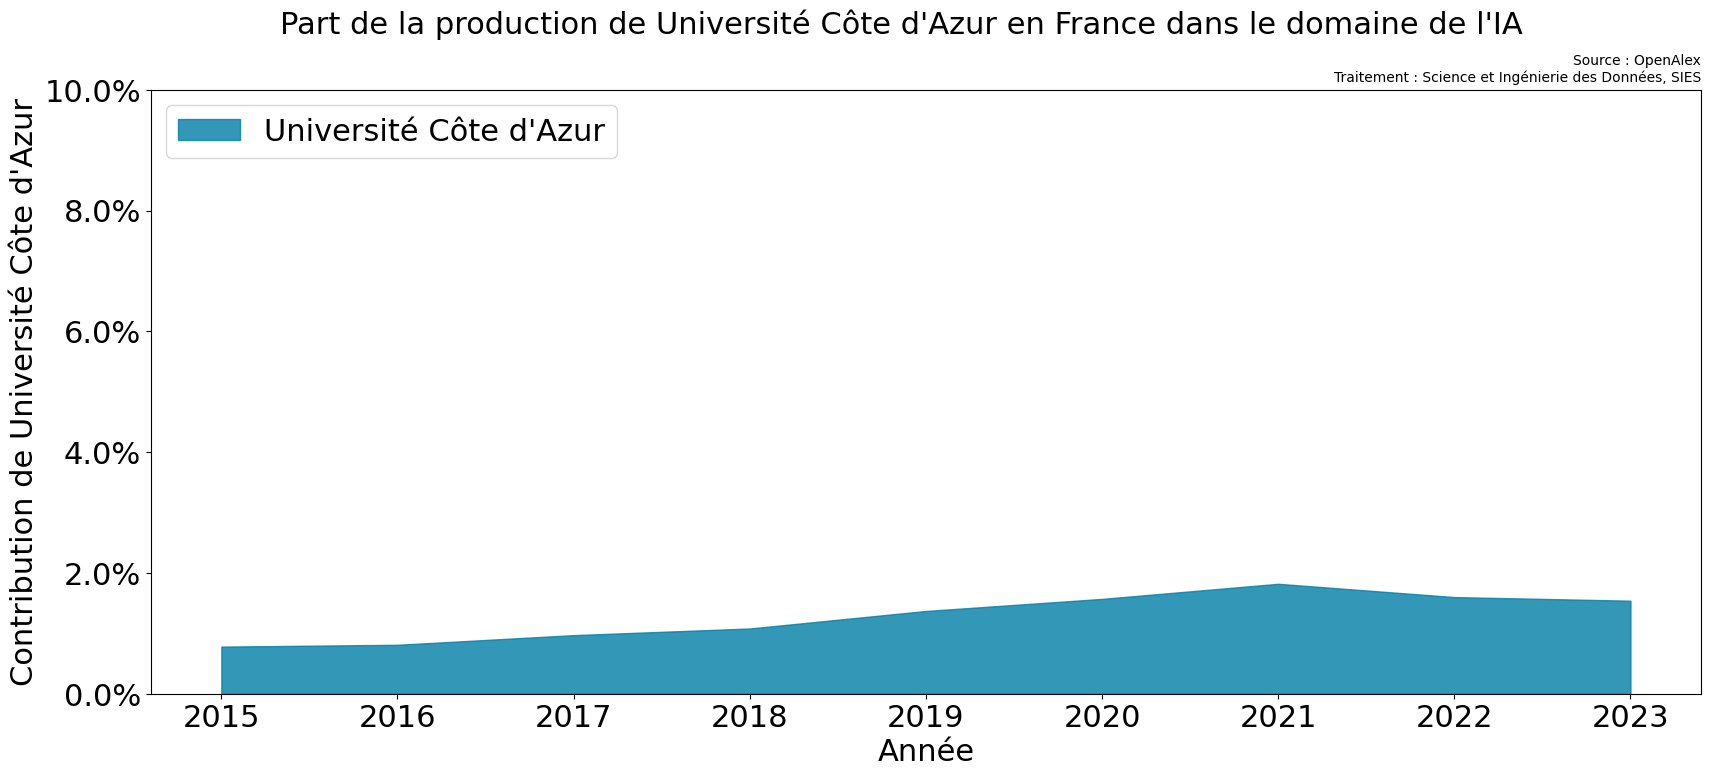

In [69]:
make_graph_share_year("Université Côte d'Azur")

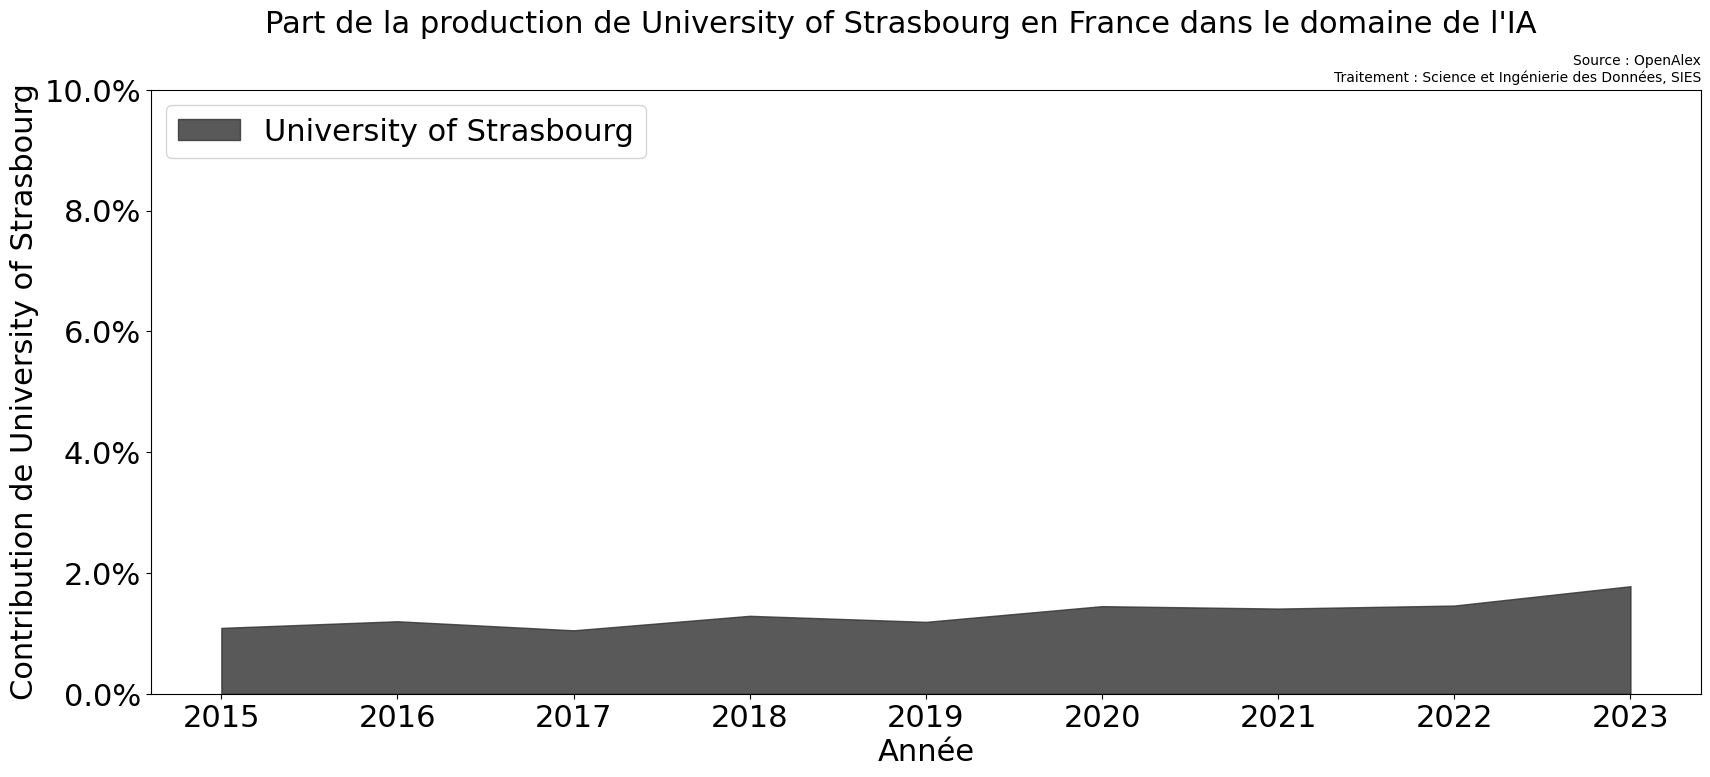

In [70]:
make_graph_share_year('University of Strasbourg')